In [61]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

In [62]:
IMAGE_SIZE = [224, 224]

In [63]:
# Image data directories
train_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\train"
test_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\test"
val_directory = r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\val"

In [64]:
# Add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [65]:
# Don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [66]:
# Get the number of classes
folders = glob(r"C:\Users\castr\OneDrive\Desktop\Image Classification\dataset\train")
num_classes = len(folders)

In [67]:
# Build the model
x = Flatten()(vgg.output)
prediction = Dense(10, activation='softmax')(x)  # Update units to 10
model = Model(inputs=vgg.input, outputs=prediction)

In [68]:
# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [69]:
# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [70]:
# Data augmentation for testing set (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
# Load training and testing sets with data augmentation
training_set = train_datagen.flow_from_directory(
    train_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Change class_mode to 'categorical'
)

test_set = test_datagen.flow_from_directory(
    test_directory,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Change class_mode to 'categorical'
)

Found 2770 images belonging to 10 classes.
Found 1377 images belonging to 10 classes.


In [73]:
# Train the model
history = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=50,  # Adjust this value
    validation_steps=len(test_set) * 2
)

Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 183s 4s/step - accuracy: 0.8474 - loss: 0.4669 - val_accuracy: 0.8700 - val_loss: 0.4190
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step - accuracy: 0.8643 - loss: 0.4282 - val_accuracy: 0.8845 - val_loss: 0.3833
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.8669 - loss: 0.4183 - val_accuracy: 0.9034 - val_loss: 0.3585
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9061 - loss: 0.3250 - val_accuracy: 0.9041 - val_loss: 0.3423
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 0.8920 - loss: 0.3272 - val_accuracy: 0.8954 - val_loss: 0.3258
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.9141 - loss: 0.2700 - val_accuracy: 0.9005 - val_loss: 0.3196
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 185s 4s/step - accuracy: 0.9262 - loss: 0.2601 - val_accuracy: 0.9259 - val_loss: 0.2621
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9306 - loss: 0.2253 - val_accuracy: 0.9237 - v

In [75]:
# Check the structure of the target labels in the dataset
sample_training_images, sample_training_labels = next(training_set)
print(f"Shape of sample_training_images: {sample_training_images.shape}")
print(f"Shape of sample_training_labels: {sample_training_labels.shape}")


Shape of sample_training_images: (32, 224, 224, 3)
Shape of sample_training_labels: (32, 10)


In [76]:
model.save('BC.h5')

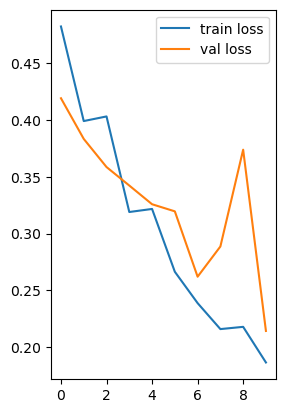

In [77]:
# Plot loss and accuracy curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

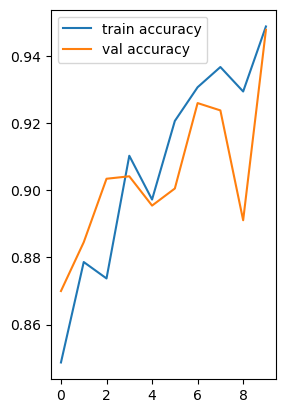

In [78]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()


In [80]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./BC.h5',compile=False)  

In [81]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

In [82]:
def output(location, model, label_mapping):
    img = load_img(location, target_size=(224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    
    predicted_class = np.argmax(prediction, axis=-1)
    class_label = label_mapping[predicted_class[0]]
    
    return class_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Philippine Eagle


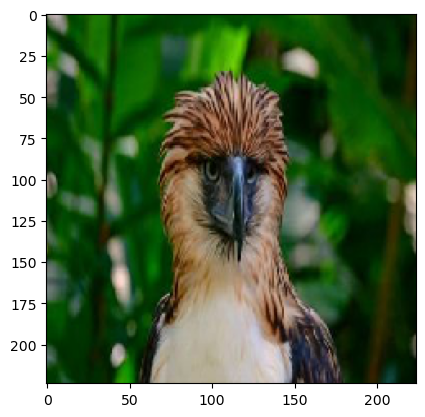

In [90]:
img_path = r"C:\Users\castr\OneDrive\Desktop\423599727_1116673382672012_4376300715151945470_n.jpg"
pic = load_img(img_path, target_size=(224, 224, 3))
plt.imshow(pic)
result = output(img_path, model1, lab)
print(result)